<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import datetime as dt
import numpy as np
import xarray as xr
from numpy import dtype
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.pyplot import cm
from math import *
from locations import *


In [6]:
%%capture

storm = 'rotstrong'

############################
if storm == 'rotstrong':
    path = '../../../../../Volumes/ONeillLab_AACPdata/originalstrong/homeyer-strong-lrg-rot.0'
    fileend = '.000000.nc'
    cross1 = -12.23
    cross2 = -12.22
if storm == 'rotweak':
    path = rotweakpath
    prefix = rotweakprefix
    fileend = rotweakfileend
    cross1 = -16.926
    cross2 = -16.923
############################


jdexv = [1800,2700,3600]
y1 = cross1
y2 = cross2
x1 = 40-121;
x2 = 80-121; 
ysel = slice(y1,y2)
xsel = slice(x1,x2)
zsel = slice(10,20)

cm2 = plt.get_cmap('Blues')

col = 1
row = 3

dpi = 450
mpl.rcParams['figure.dpi']=dpi

cm = 1/2.54
f, ax = plt.subplots(row,col,figsize = (9.15*cm,8.5*cm))

In [7]:
ind = 0
for rr in range(1):
    if rr < 3:
        jdex = jdexv[ind]
        file = path + str(jdex) + fileend
        ds = xr.open_dataset(file)
    
        xh = ds['xh'].sel(xh=xsel)+121 #arbitrary addition to avoid negative locations
        yh = ds['yh'].sel(yh=ysel)+55  #arbitrary addition to avoid negative locations
        zh = ds['zh'].sel(zh=zsel)
        #print(yh)

        x = np.arange(xh[0],xh[-1]+0.050,0.050)  # model grid spaces aren't perfectly 50 m apart,
        z = np.arange(zh[0],zh[-1],0.050)        # so correct for small machine error discrepancies
        
        u = np.squeeze(ds['uinterp'].sel(xh=xsel,yh=ysel,zh=zsel))
        v = np.squeeze(ds['vinterp'].sel(xh=xsel,yh=ysel,zh=zsel))
        w = np.squeeze(ds['winterp'].sel(xh=xsel,yh=ysel,zh=zsel))
        windspeed = np.sqrt(u**2+v**2+w**2)
    
        qvpert = np.squeeze(ds['qvpert'].sel(xh=xsel,yh=ysel,zh=zsel))
        qv0    = np.squeeze(ds['qv0'].sel(zh=zsel))
        qv03dtile = np.tile(qv0,(len(x),1))
        qv = (qv03dtile.T + qvpert)/1000.
        del qv03dtile, qvpert

        thpert = np.squeeze(ds['thpert'].sel(xh=xsel,yh=ysel,zh=zsel))
        th0    = np.squeeze(ds['th0'].sel(zh=zsel))
        th03dtile = np.tile(th0,(len(x),1))
        theta = th03dtile.T + thpert
        del th03dtile, thpert
    
        qc = np.squeeze(ds['qc'].sel(xh=xsel,yh=ysel,zh=zsel))/1000.
        qi = np.squeeze(ds['qi'].sel(xh=xsel,yh=ysel,zh=zsel))/1000.
        qg = np.squeeze(ds['qg'].sel(xh=xsel,yh=ysel,zh=zsel))/1000.
        qs = np.squeeze(ds['qs'].sel(xh=xsel,yh=ysel,zh=zsel))/1000.

    
        levels1 = [10 + 25*n for n in range(10)]
        cm2.set_over((0., 0., 0.))
        cm2.set_under((1., 1., 1.))
        qvax = ax[rr].contourf(x,z,qv*28.97/18.02*10**6,levels=levels1,cmap=cm2,extend='both')

        
#         levels2 = np.arange(360,540,10)
#         cs = ax[rr].contour(x,z,theta,levels=levels2,
#                      linewidths=0.5,colors='m')#[colors[ind]])
#         ax[rr].clabel(cs,inline=1,fontsize=7,fmt='%.f')
        
        #plot windspeed contour
        ax[rr].contour(x,z,windspeed,[75],colors='r',linewidths=2)
        
        #plot condensed cloud water mass mixing ratio
        ax[rr].contour(x,z,qc+qi+qg+qs,[5e-5],colors='k',linewidths=0.5)
        
        #plot streamlines in-plane, only above 360 K surface
        ax[rr].streamplot(x,z,u*(theta<360),w*(theta<360),linewidth=0.5) # FLAG
        ax[rr].set_ylim(10,20)
        ax[rr].set_ylabel('Altitude [km]',fontsize=7)
        
        if rr<2:
            labels = [item.get_text() for item in ax[rr].get_xticklabels()]
            empty_string_labels = ['']*len(labels)
            ax[rr].set_xticklabels(empty_string_labels)
        
        if rr==2:
            ax[rr].set_xlabel('East [km]',fontsize=7)
        ax[rr].tick_params(axis='x',labelsize=7)
        ax[rr].tick_params(axis='y',labelsize=7)
        #ax[rr].set_title(np.str(jdex/60)+' min at y='+np.str(yh.values),fontsize=9)#+', '+np.str(yh.values-55))
        ind = ind + 1

    if rr == 3:
        ax[rr].axis("off")
        cbar = f.colorbar(qvax,ax=ax[rr],
                boundaries = levels1,
                extendfrac='auto',orientation='horizontal')
                #spacing='proportional'
                #orientation='horizontal'
        cbar.set_label("water vapor mixing ratio [ppmv]",fontsize=7,labelpad=+7)
        cbar.ax.tick_params(labelsize=7)

        
# plt.tight_layout(h_pad=1.25)
# plt.savefig('Fig1_'+storm+'.pdf')

/var/folders/3l/phmqvp1s6y5_l56qp_wwfrb80000gn/T/ipykernel_97344/633255816.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[rr].set_xticklabels(empty_string_labels)


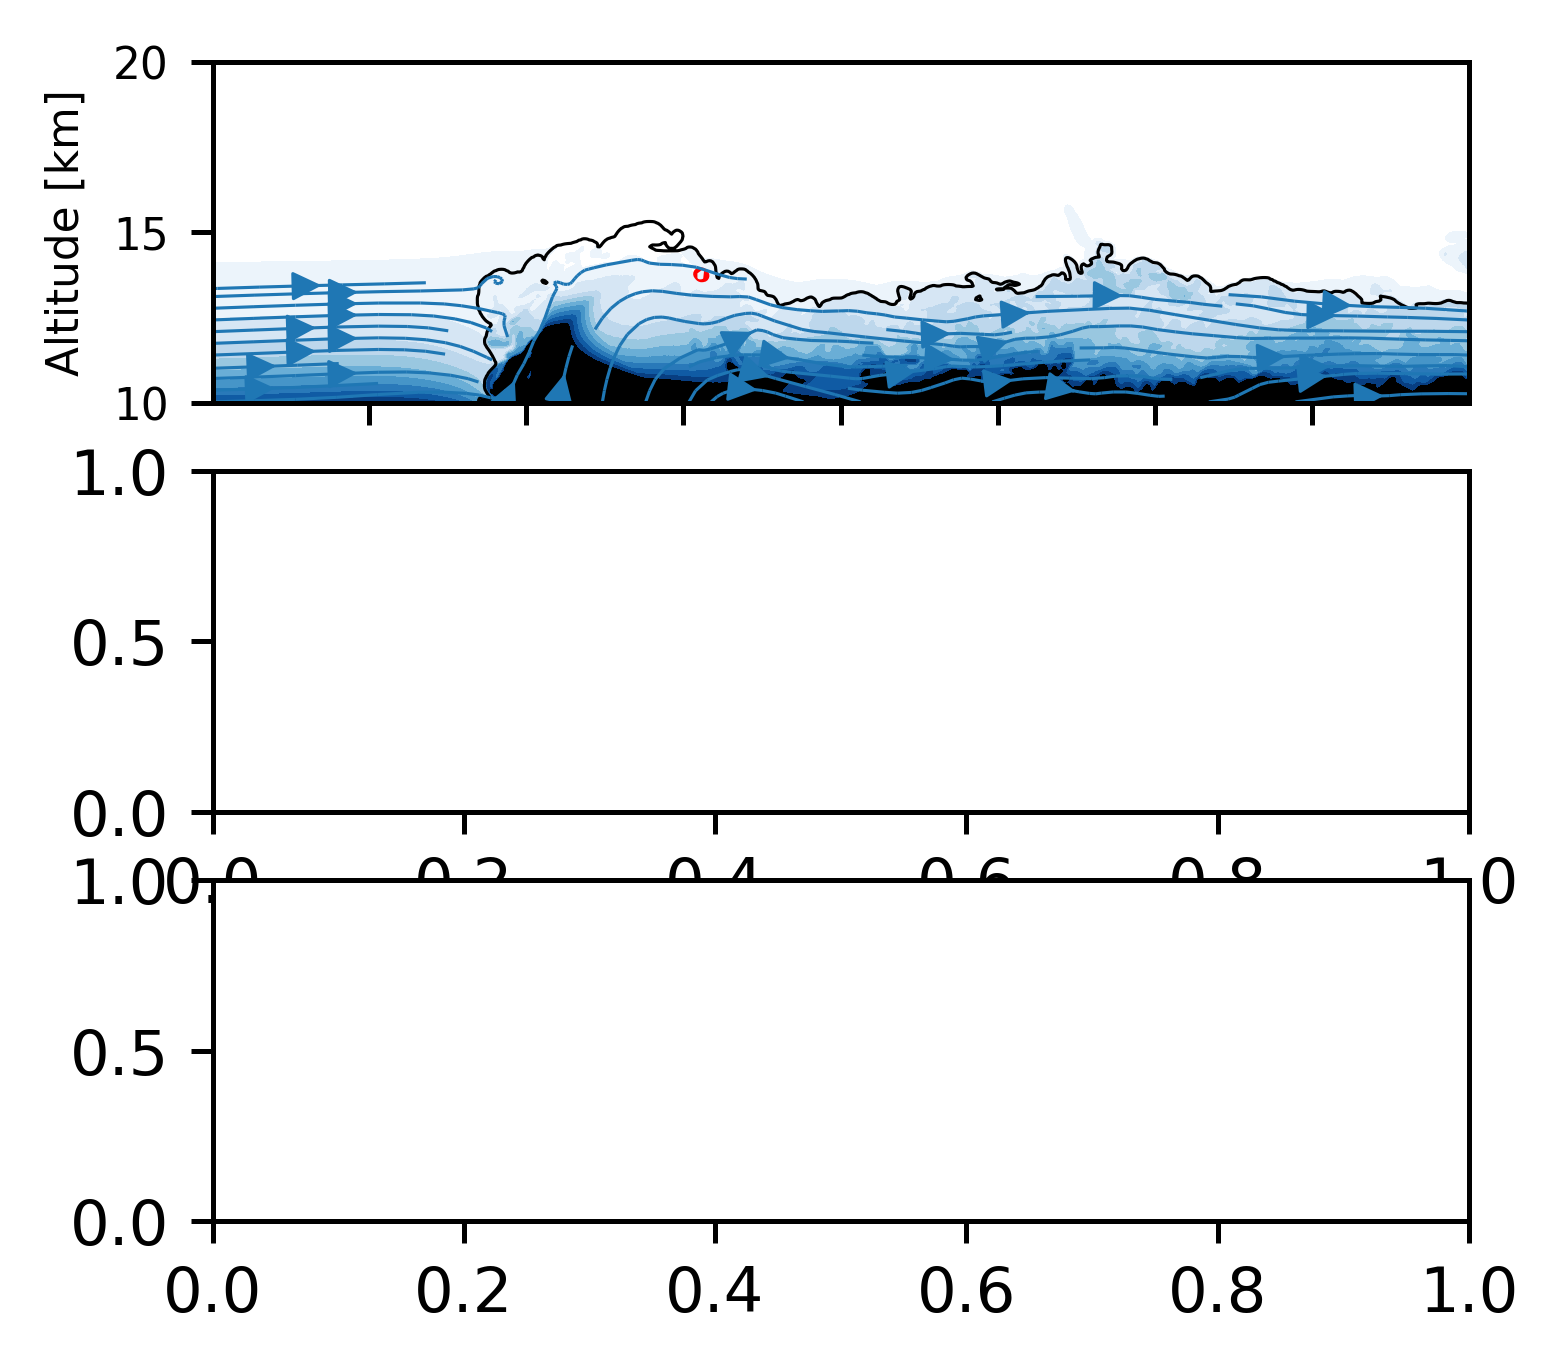

In [8]:
f

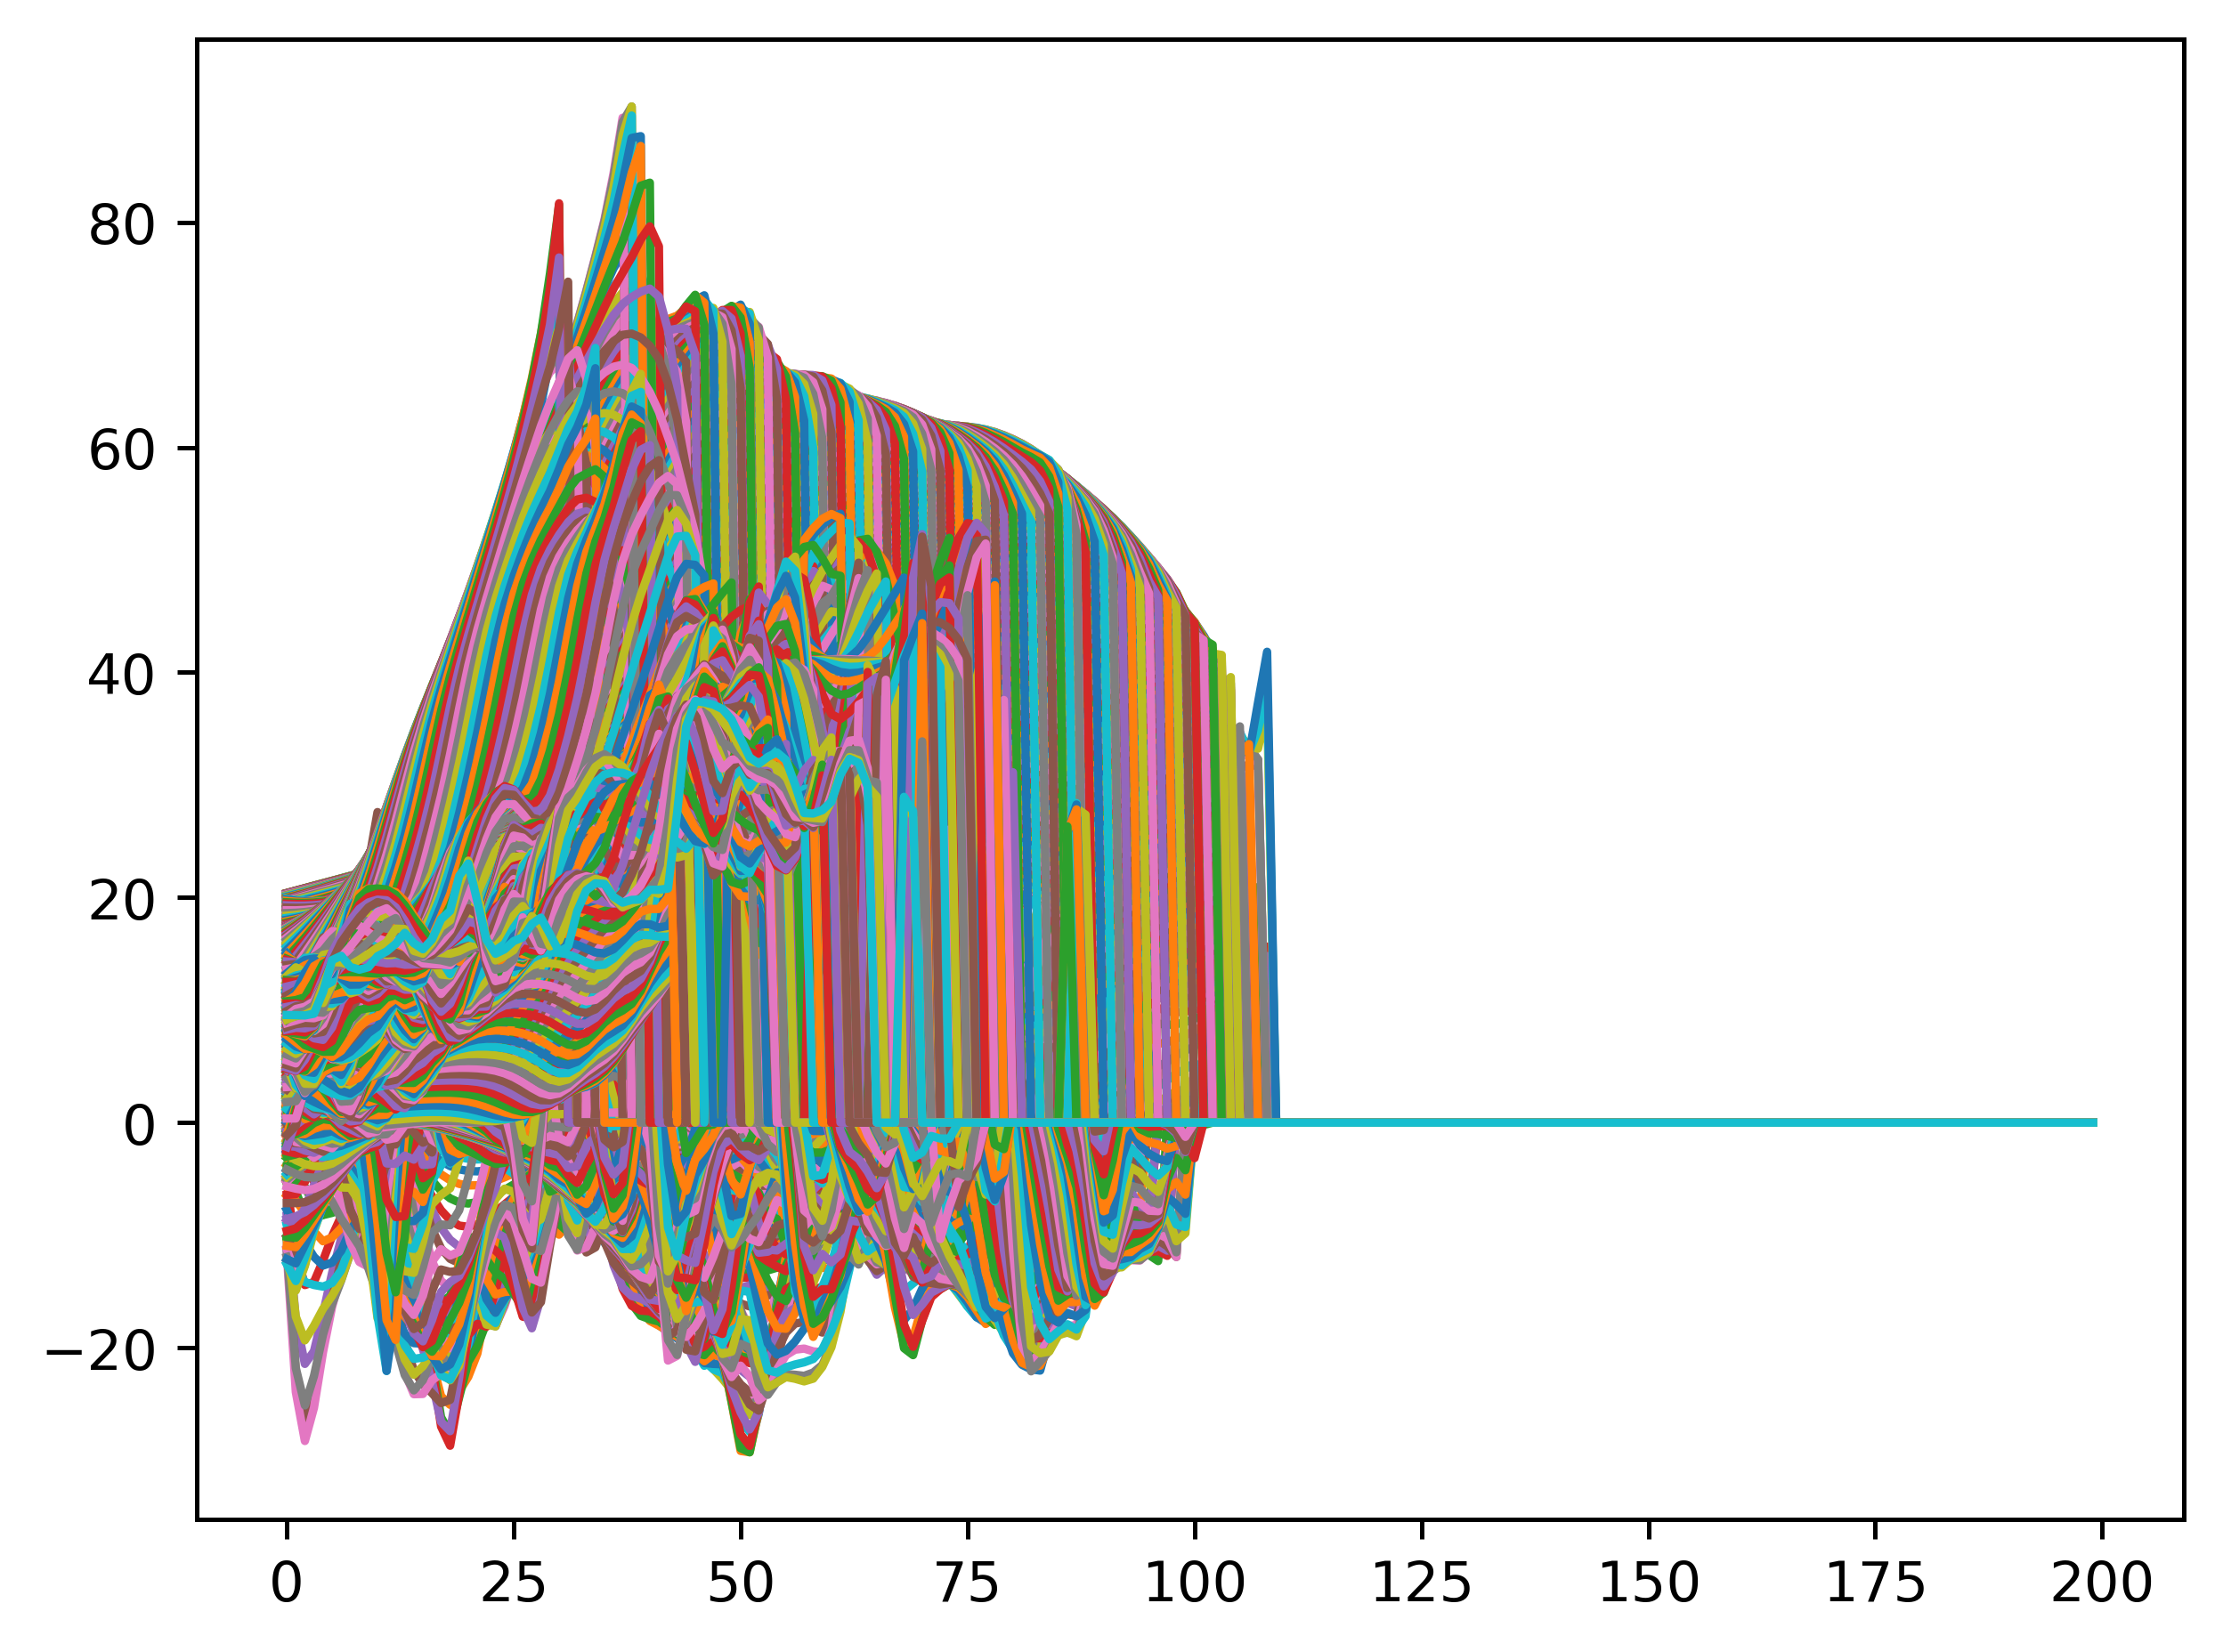

In [14]:
plt.plot(u * (theta<360))

In [52]:
theta.shape

(200, 800)

In [55]:
streamlines = ax[rr].streamplot(x,z,u,w,broken_streamlines=False,linewidth=0.5)

TypeError: streamplot() got an unexpected keyword argument 'broken_streamlines'

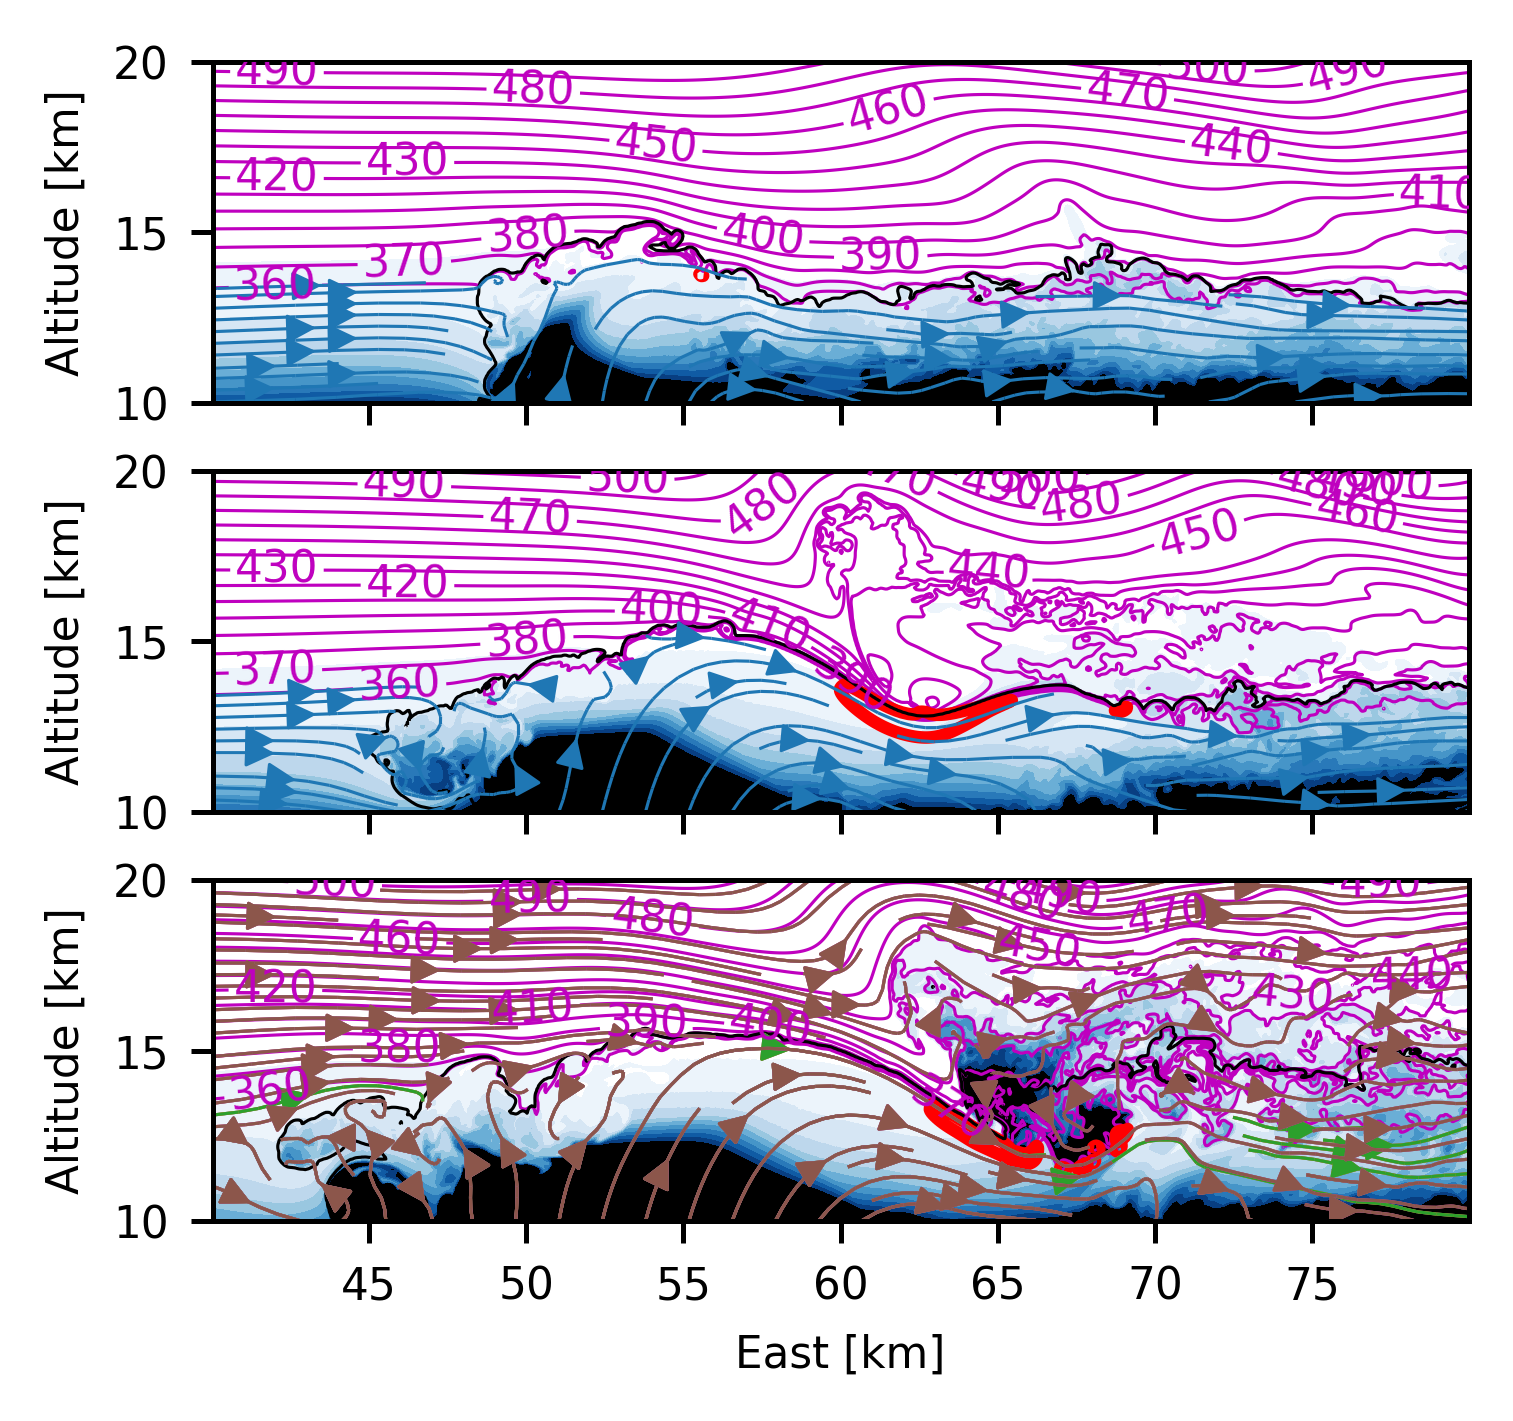

In [54]:
f

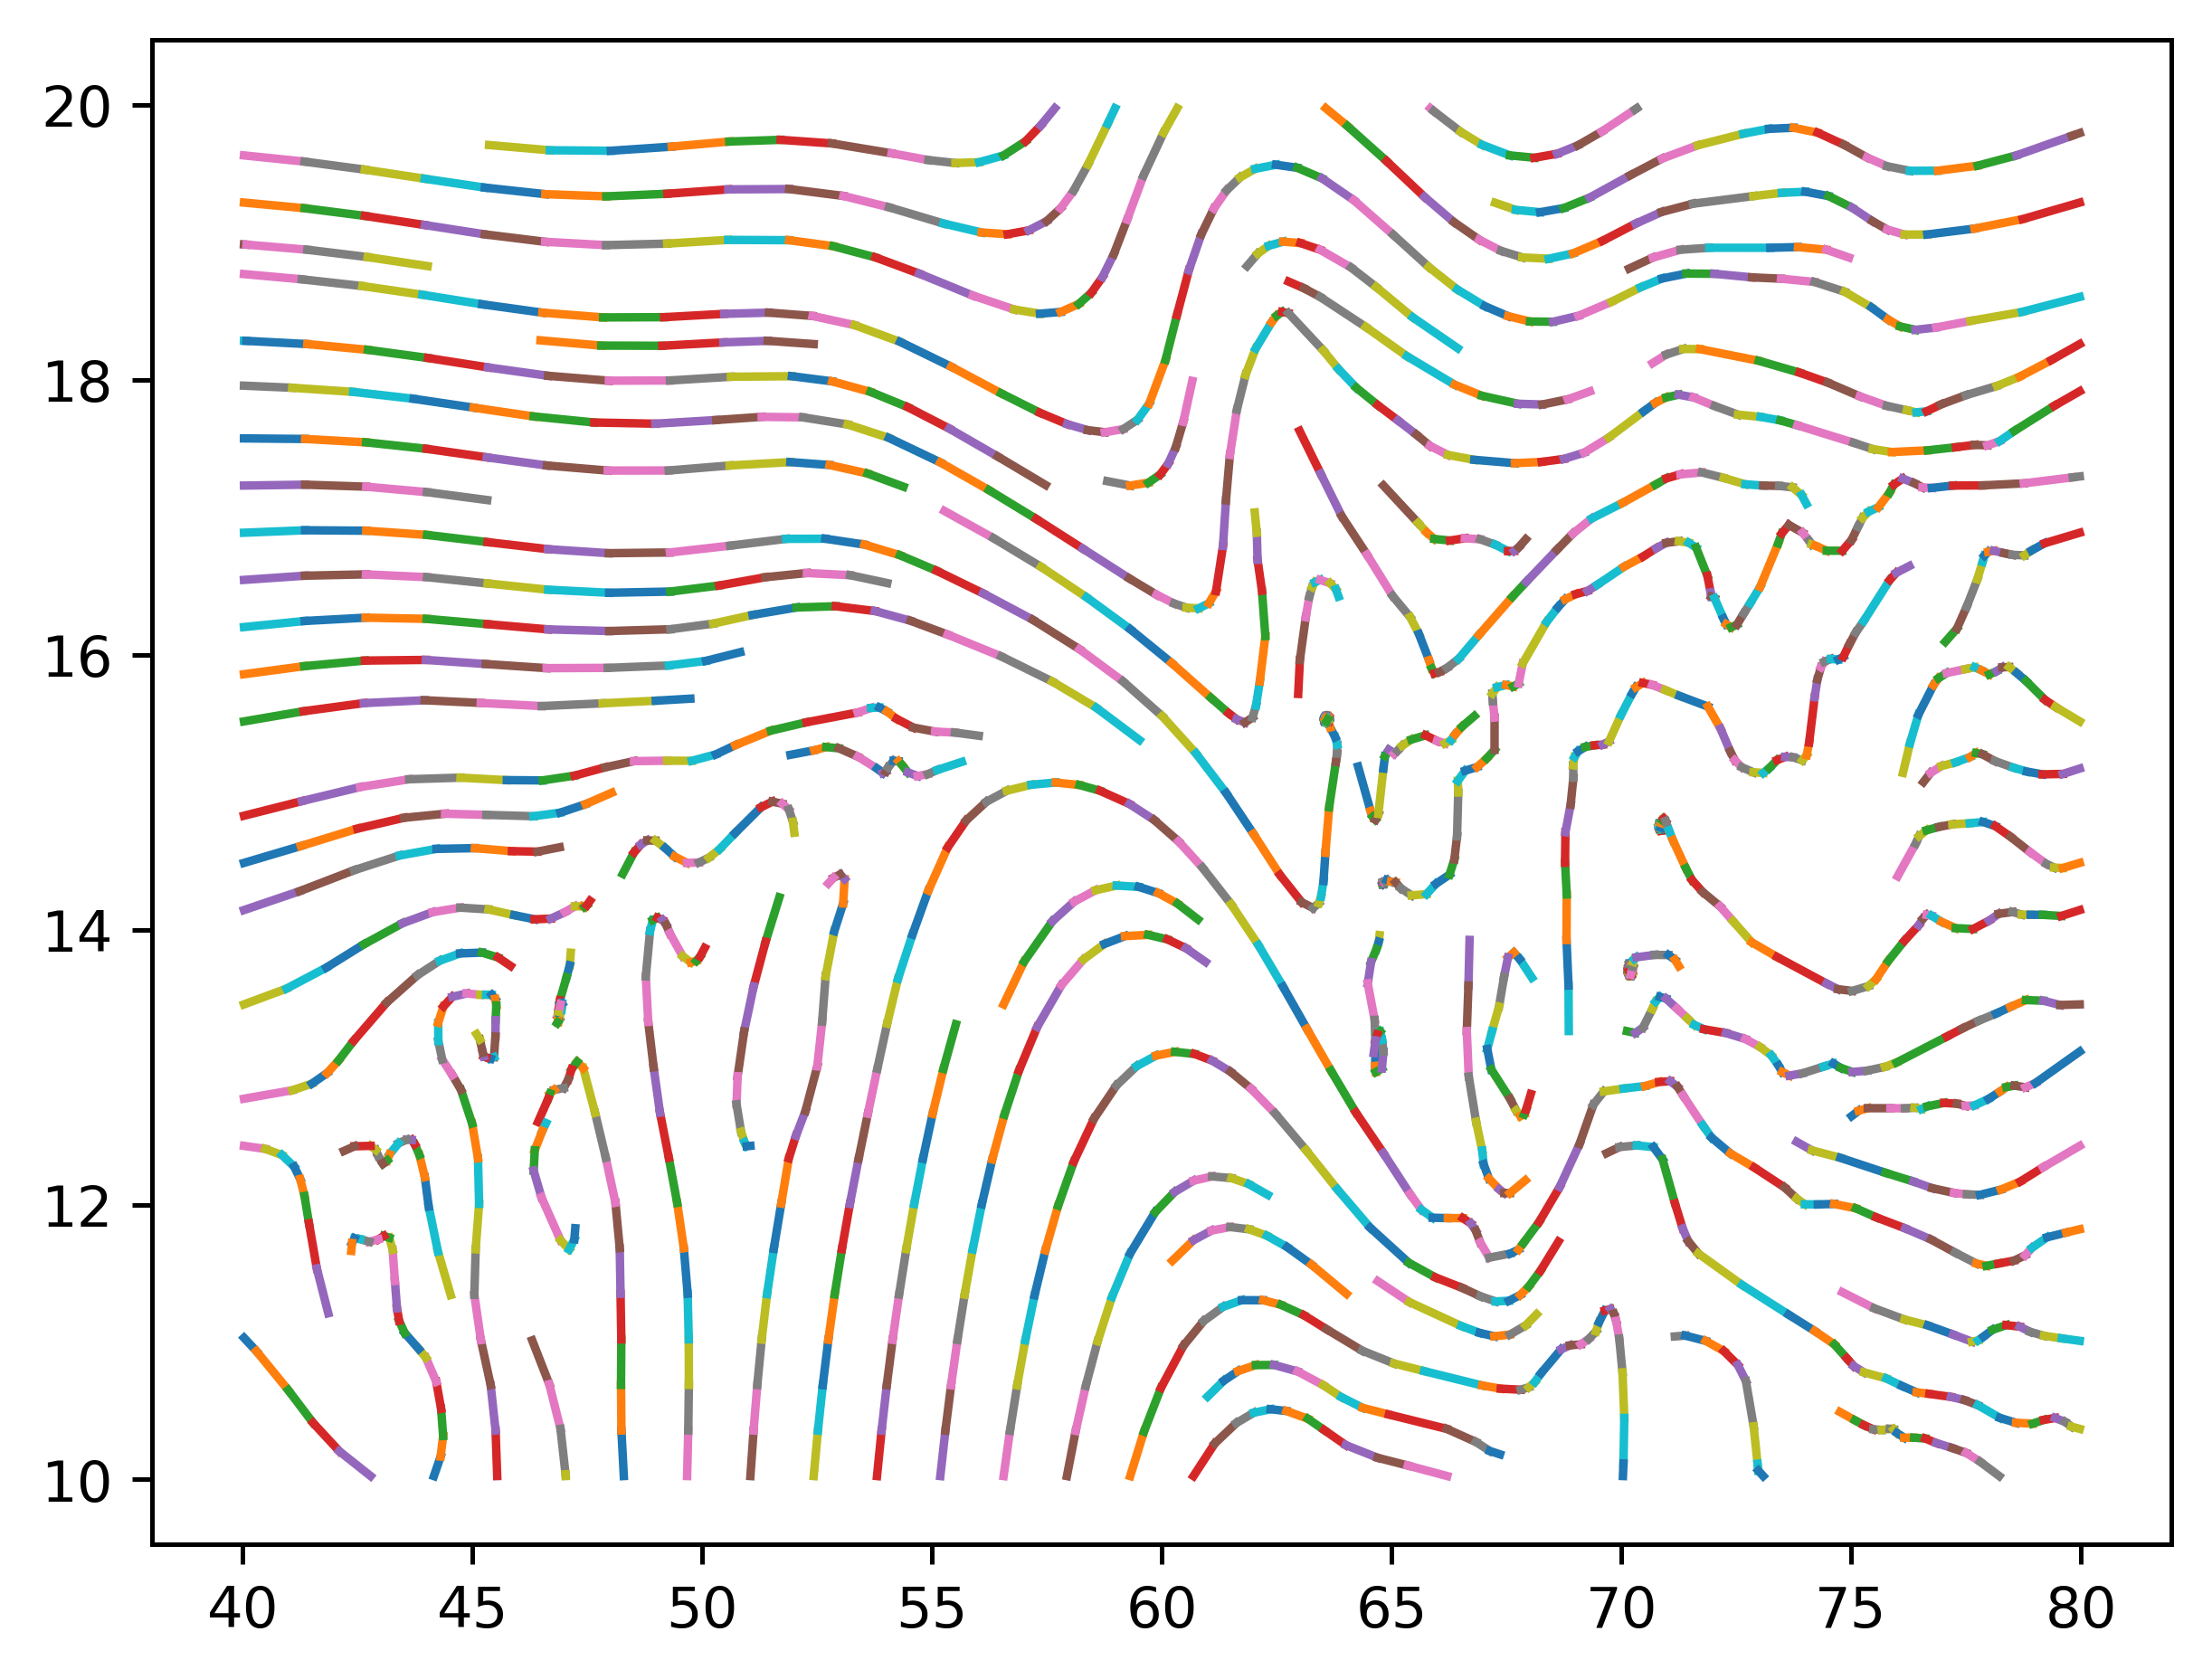

In [48]:
for segment in streamlines.lines.get_paths():
    path = segment.vertices.transpose()
    plt.plot(path[0], path[1])

In [49]:
streamlines.lines.get_paths()

[Path(array([[40.02500153, 11.03030531],
        [40.29472043, 10.93382013]]), None),
 Path(array([[40.29472043, 10.93382013],
        [40.98608381, 10.65080351]]), None),
 Path(array([[40.98608381, 10.65080351],
        [41.52748374, 10.4122313 ]]), None),
 Path(array([[41.52748374, 10.4122313 ],
        [42.09952514, 10.20554133]]), None),
 Path(array([[42.09952514, 10.20554133],
        [42.78017394, 10.02499962]]), None),
 Path(array([[42.78017394, 10.02499962],
        [42.78017394, 10.02499962]]), None),
 Path(array([[42.78017394, 10.02499962],
        [42.78017394, 10.02499962]]), None),
 Path(array([[44.15776015, 10.02499962],
        [44.15776015, 10.02499962]]), None),
 Path(array([[44.15776015, 10.02499962],
        [44.15776015, 10.02499962]]), None),
 Path(array([[44.15776015, 10.02499962],
        [44.15776015, 10.02499962]]), None),
 Path(array([[44.15776015, 10.02499962],
        [44.30375105, 10.16662719]]), None),
 Path(array([[44.30375105, 10.16662719],
        [44.3